In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use(['science','ieee'])

In [8]:
df_regret = pd.read_csv('./run-.-tag-Metrics_RegretMetric.csv')
df_return = pd.read_csv('./run-.-tag-Metrics_AverageReturn.csv')
df_td_loss = pd.read_csv('./run-.-tag-Losses_td_loss.csv')
df_td_loss.head(), df_regret.head(), df_return.head()

(      Wall time  Step         Value
 0  1.655051e+09     0  92046.593750
 1  1.655051e+09     1  77217.078125
 2  1.655051e+09     2  50832.289062
 3  1.655051e+09     3  31180.451172
 4  1.655051e+09     4  86294.656250,
       Wall time  Step      Value
 0  1.655051e+09    16  63.005730
 1  1.655051e+09    32  24.873913
 2  1.655051e+09    48  25.871346
 3  1.655051e+09    64  30.747410
 4  1.655051e+09    80  23.374941,
       Wall time  Step       Value
 0  1.655051e+09    16  -45.204052
 1  1.655051e+09    32   59.798351
 2  1.655051e+09    48  -40.494904
 3  1.655051e+09    64 -133.098480
 4  1.655051e+09    80  -57.601124)

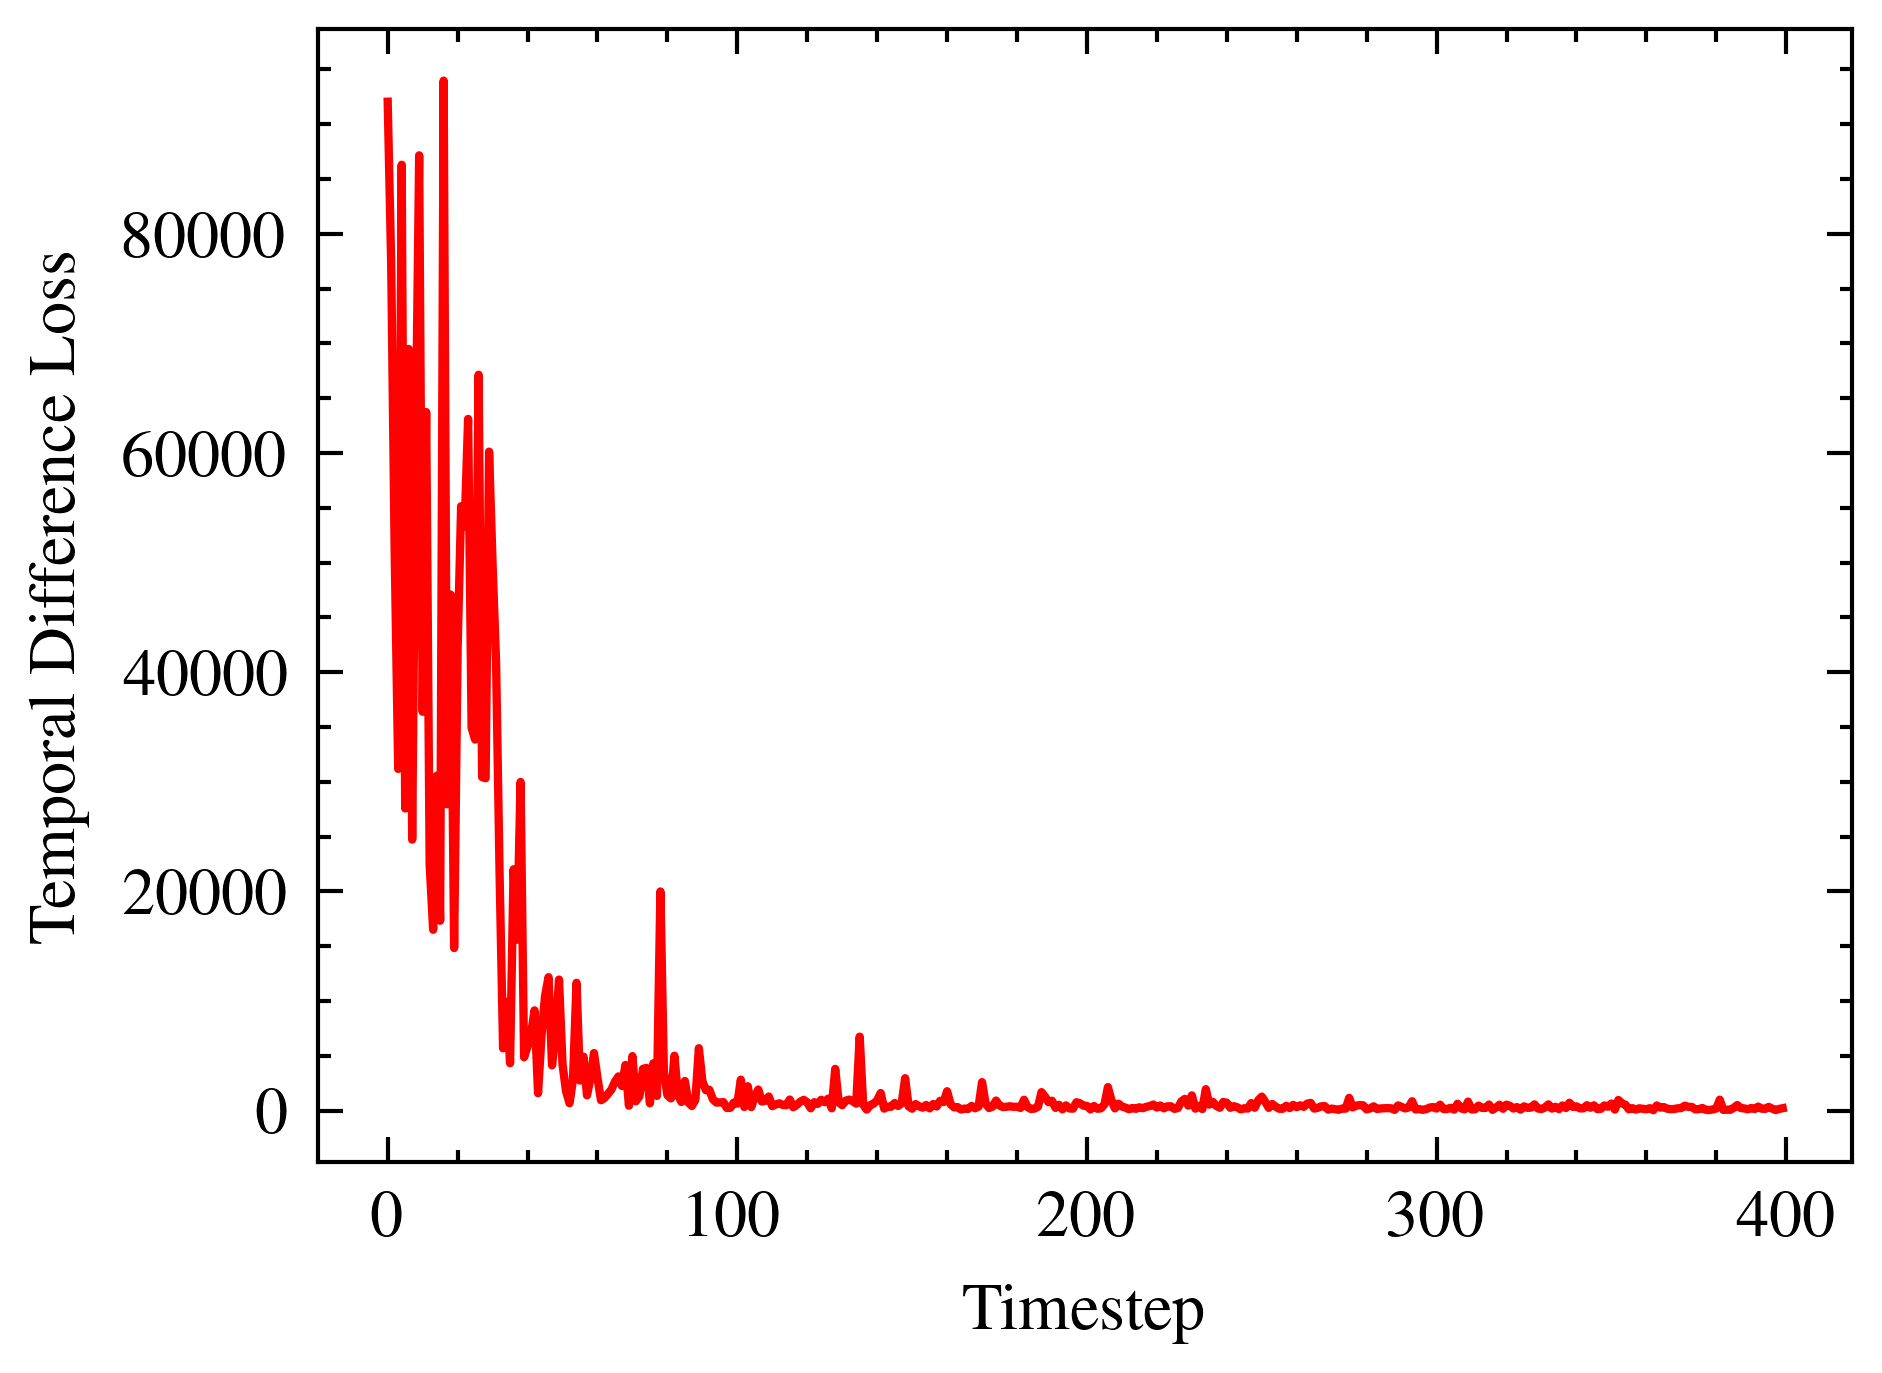

In [20]:
plt.figure()
plt.plot(df_td_loss['Step'], df_td_loss['Value'], 'r-')
plt.xlabel('Timestep')
plt.ylabel('Temporal Difference Loss')
plt.show()

In [28]:
df_td_loss.iloc[14]

Wall time    1.655051e+09
Step         1.400000e+01
Value        3.055016e+04
Name: 14, dtype: float64

In [26]:
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

weight = 0.6
points = np.asarray(df_td_loss['Value'])
smoothed_points = smooth(points, weight)
smoothed_points[14]

31912.536600807423

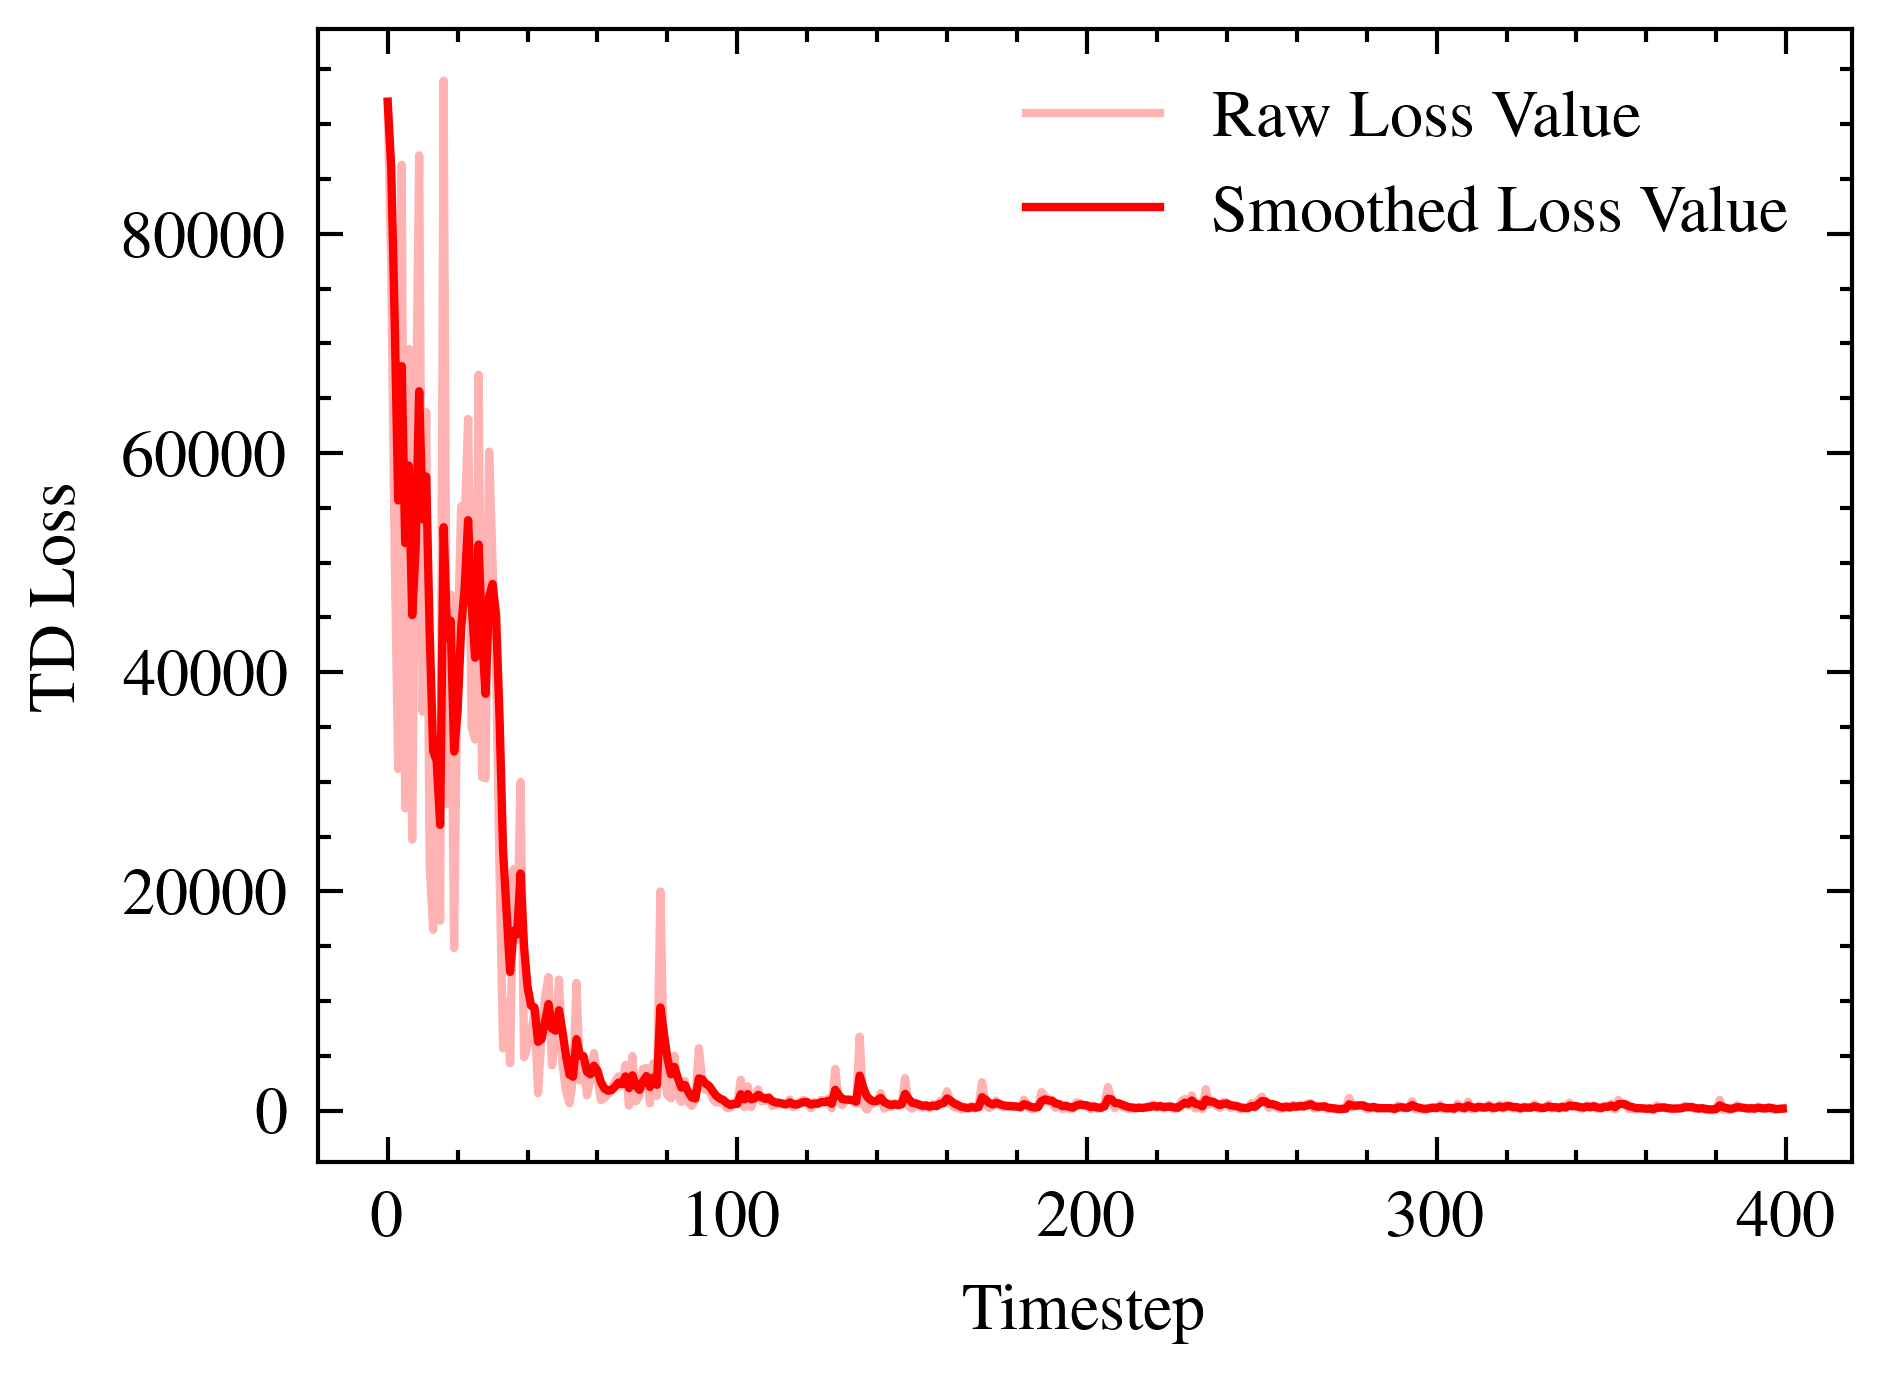

In [40]:
timesteps = np.asarray(df_td_loss['Step'])
raw_points = np.asarray(df_td_loss['Value'])
plt.figure()
plt.plot(timesteps, raw_points, 'r-', alpha=0.3)
plt.plot(timesteps, smoothed_points, 'r-')
plt.legend(['Raw Loss Value', 'Smoothed Loss Value'])
plt.xlabel('Timestep')
plt.ylabel('TD Loss')
plt.savefig('./loss-param.png')
plt.show()

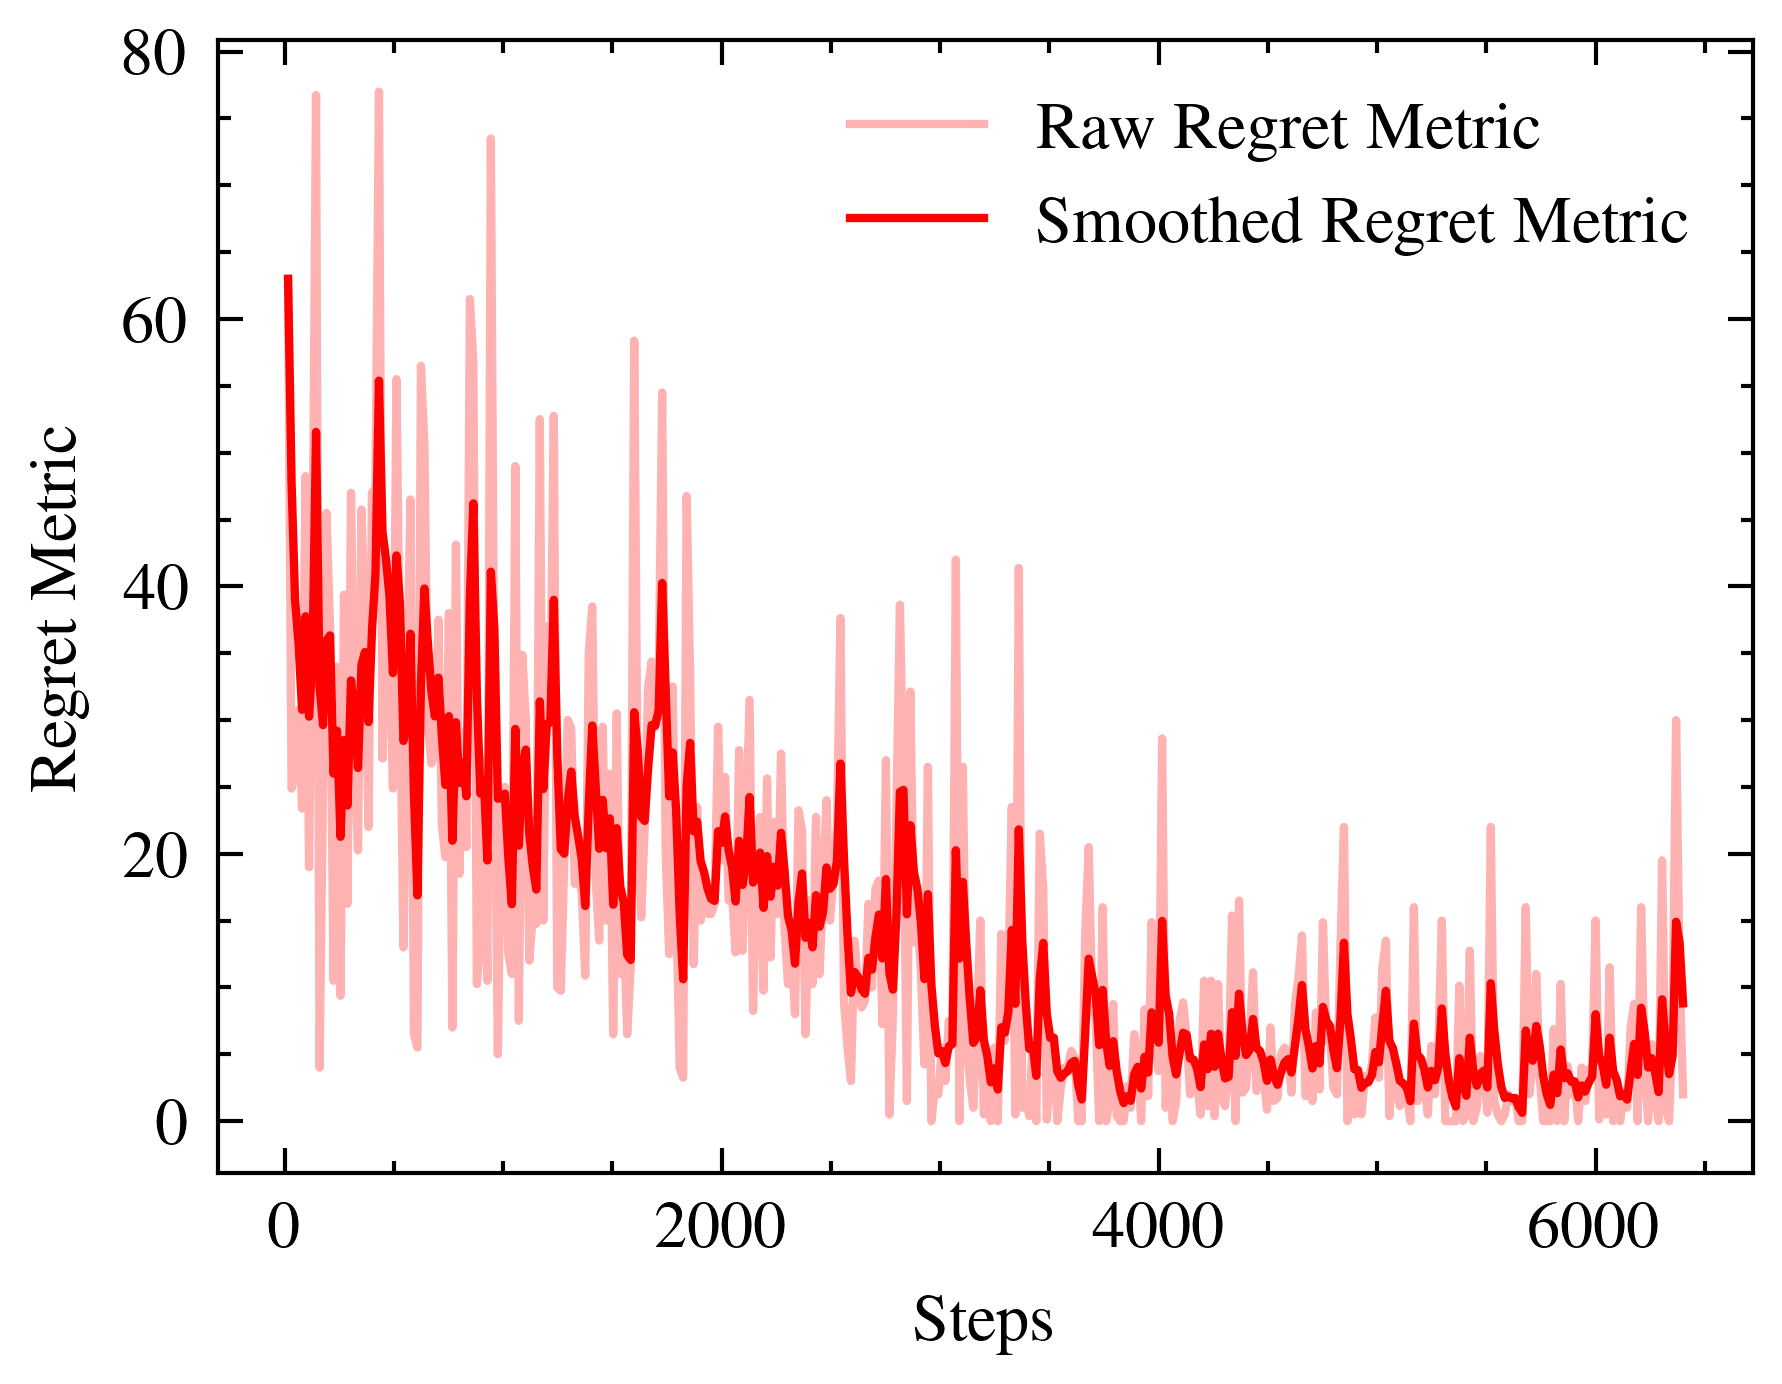

In [57]:
steps = np.asarray(df_regret['Step'])

regret = np.asarray(df_regret['Value'])
smoothed_regret = smooth(regret, weight)

plt.figure()
plt.plot(steps, regret, 'r-', alpha=0.3)
plt.plot(steps, smoothed_regret, 'r-')
plt.xlabel('Steps')
plt.ylabel('Regret Metric')
plt.legend([
    'Raw Regret Metric',
    'Smoothed Regret Metric'
])
plt.savefig('./regret-metric.png')
plt.show()

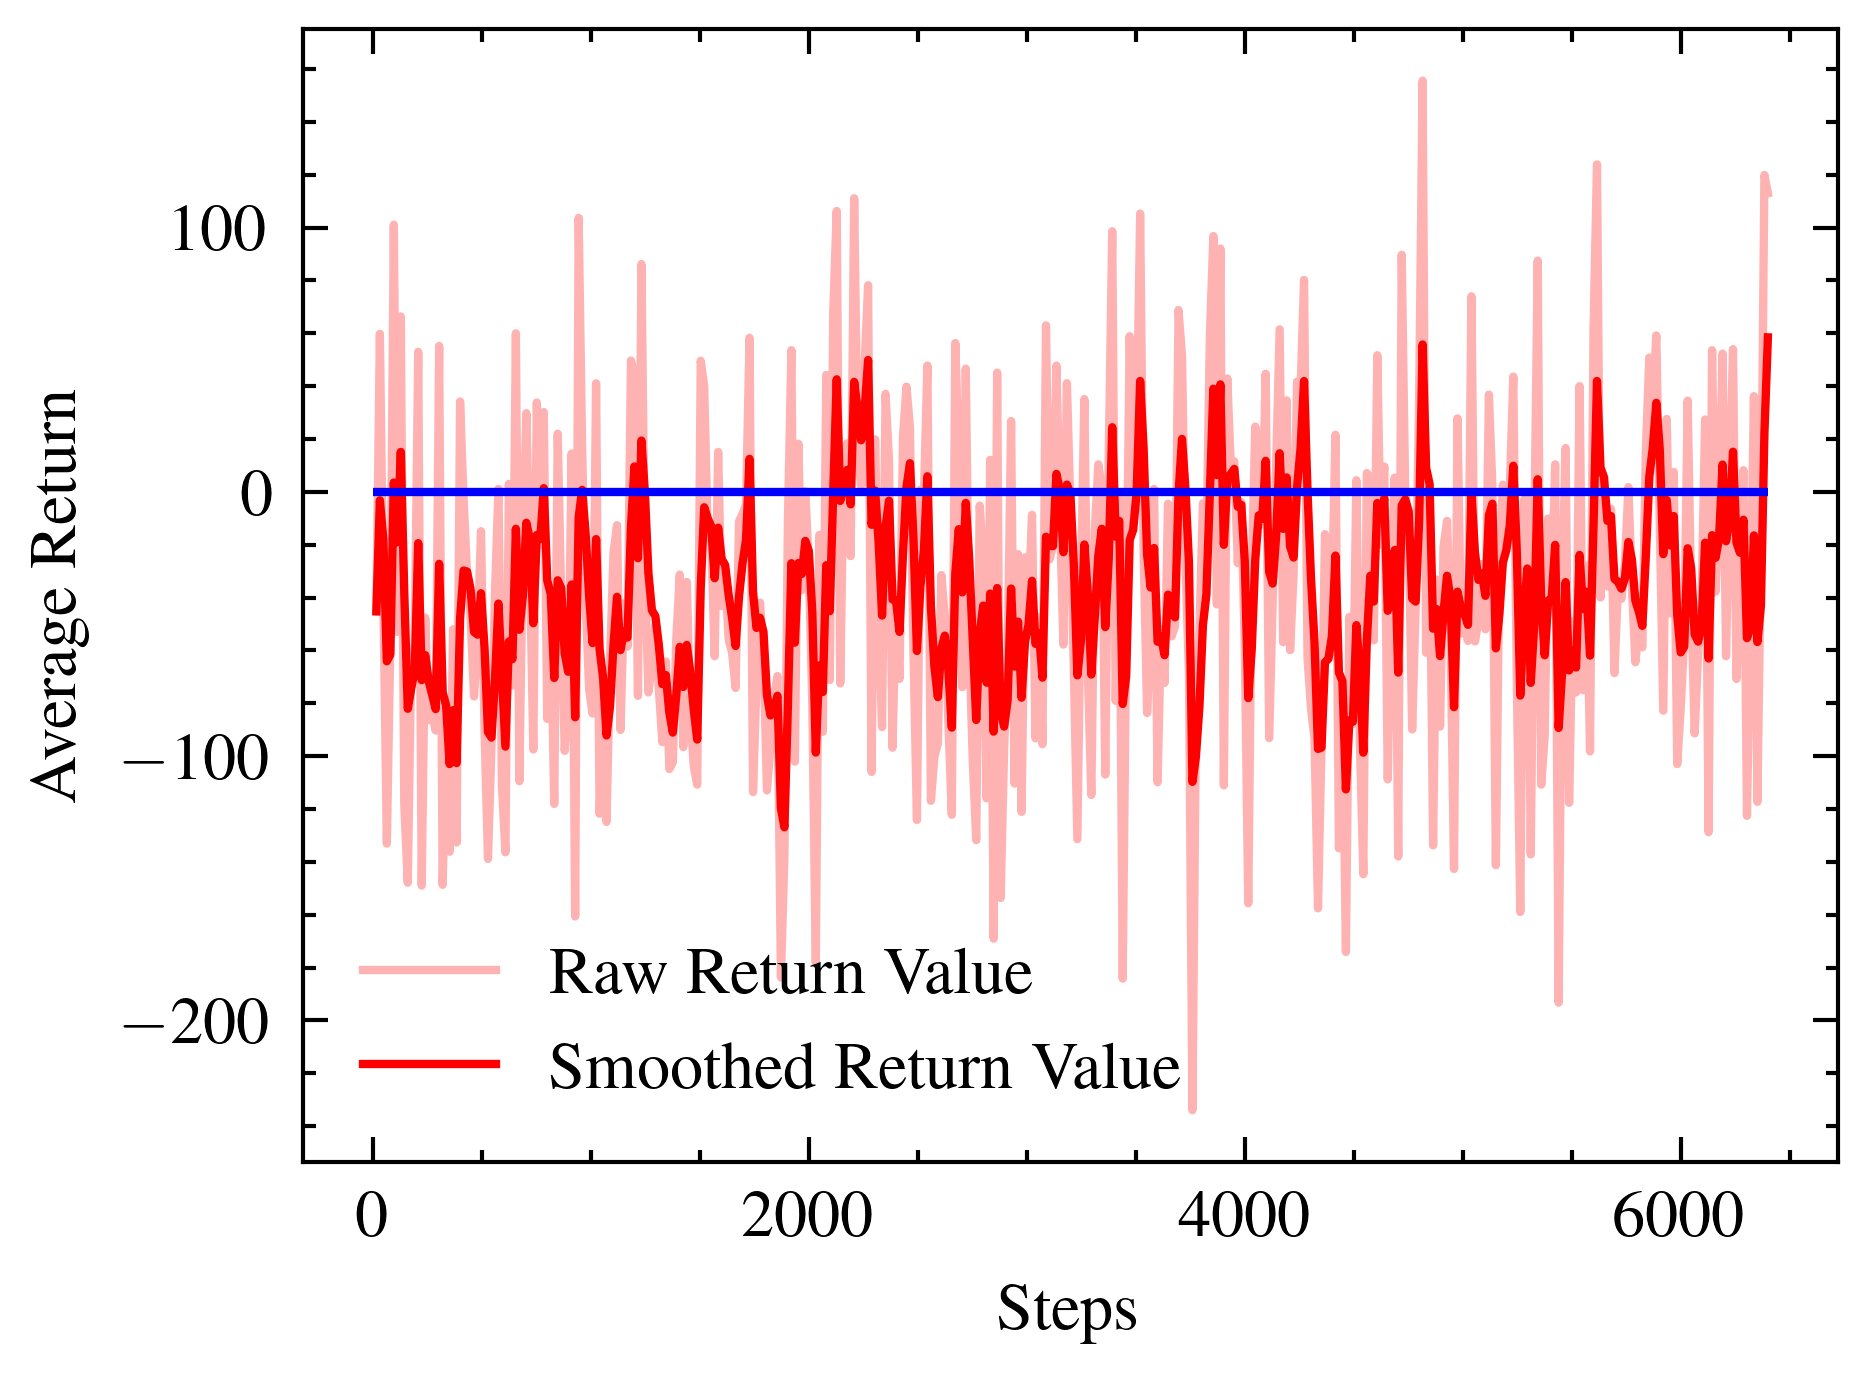

In [63]:
returns = np.asarray(df_return['Value'])
smoothed_return = smooth(returns, weight)

plt.figure()
plt.plot(steps, returns, 'r-', alpha=0.3)
plt.plot(steps, smoothed_return, 'r-')
plt.hlines(0, xmin=0, xmax=6400, color='b')
plt.legend([
    'Raw Return Value',
    'Smoothed Return Value'
])
plt.xlabel('Steps')
plt.ylabel('Average Return')
plt.savefig('./return-metric.png')
plt.show()

In [56]:
steps

0        16
1        32
2        48
3        64
4        80
       ... 
395    6336
396    6352
397    6368
398    6384
399    6400
Name: Step, Length: 400, dtype: int64